# Eroded Otsu-labeling
This operation segments and labels an image using blurring, Otsu-thresholding, binary erosion and masked Voronoi-labeling.

After bluring and thresholding using Otsu's method, iterative binary erosion is applied. Objects in the eroded image are labeled using connected component labeling and these labels are dilated to fit again into the initial binary image using masked-Voronoi labeling.

This function is similar to `voronoi_otsu_labeling`. It is intended to deal better in cases where labels of objects swapping into each other if objects are dense. Like when using Voronoi-Otsu-labeling, small objects may disappear when applying this operation.

This function is inspired by a similar [implementation in Java](https://github.com/biovoxxel/bv3dbox/blob/9e38ed02cff606e7e8fbe57db0f6af810bf1a83a/BioVoxxel_3D_Box/src/main/java/de/biovoxxel/bv3dbox/plugins/BV_LabelSplitter.java#L83) by Jan Brocher (Biovoxxel) in the [Biovoxxel toolbox](https://zenodo.org/badge/latestdoi/434949702). Big thanks Jan!

In [1]:
from skimage.data import cells3d
import pyclesperanto_prototype as cle
import napari_segment_blobs_and_things_with_membranes as nsbatwm

In [2]:
image = cells3d()
image.shape

(60, 2, 256, 256)

We just crop out a 2D slice.

cl.OCLArray([[ 8868.,  6923.,  5690., ..., 13942., 12804., 14653.],
       [ 7113.,  5501.,  5216., ..., 16739., 13657., 15554.],
       [ 5833.,  7160.,  5928., ..., 15838., 16739., 17166.],
       ...,
       [ 2513.,  3936.,  3414., ...,  3699.,  4126.,  4220.],
       [ 3319.,  3272.,  2513., ...,  3699.,  3367.,  2940.],
       [ 3130.,  3794.,  3225., ...,  2987.,  3746.,  4315.]],
      dtype=float32)
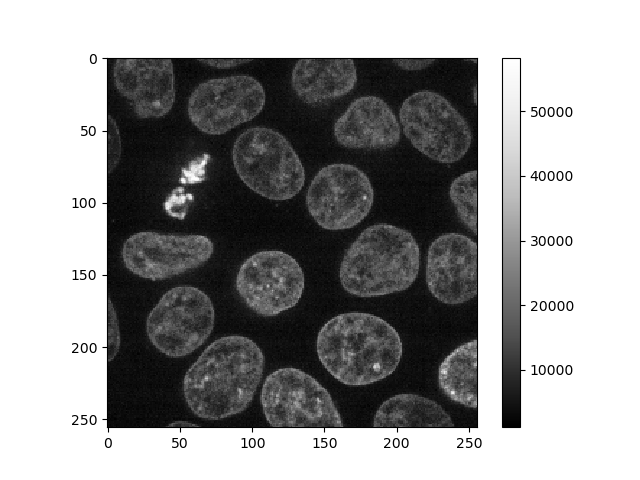
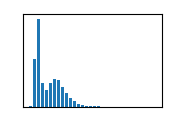

In [3]:
nuclei = cle.asarray(image[30, 1])
nuclei

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
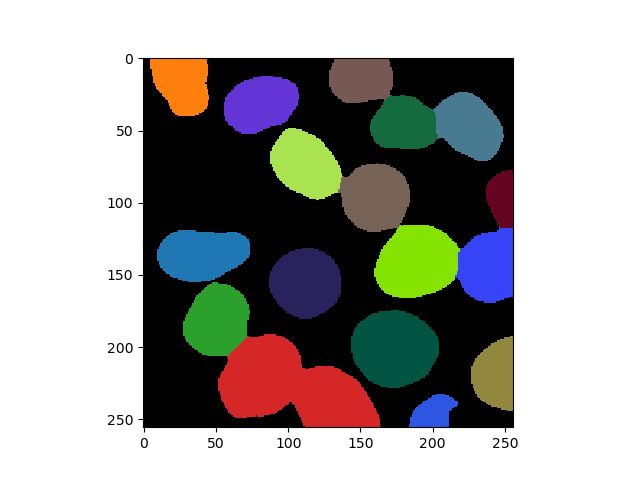

In [4]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=11, outline_sigma=4)
labels

## Parameter: number_of_erosions
If the specified number of erosions is too small, sticky objects will be labeled together.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
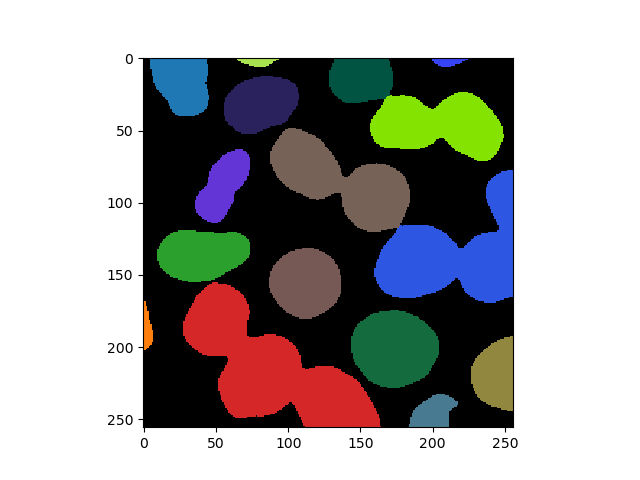

In [5]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=5, outline_sigma=4)
labels

If too many erosions are configured, objects may disappear.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
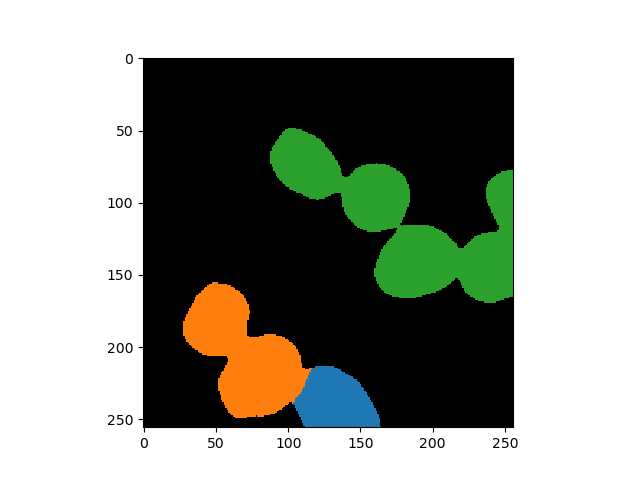

In [6]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=20, outline_sigma=4)
labels

## Parameter: outline_sigma
With this outline, you can control the denoising before thresholding. If this value is too low, objects may have noisy edges and holes lead to more object-splits.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
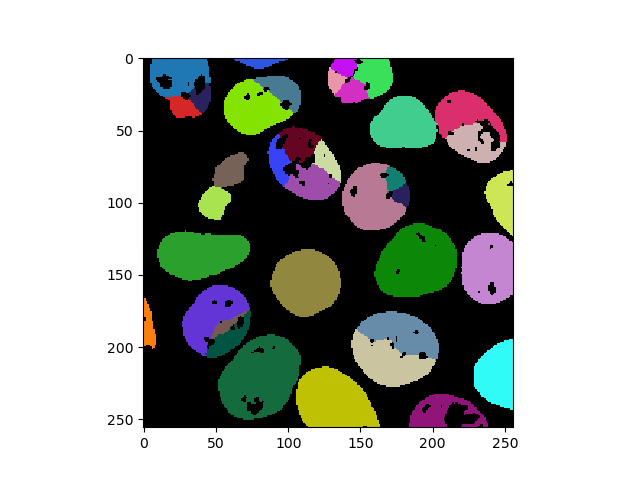

In [7]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=5, outline_sigma=1)
labels

If this value is too high, object outlines may be not fitting to the original objects anymore.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
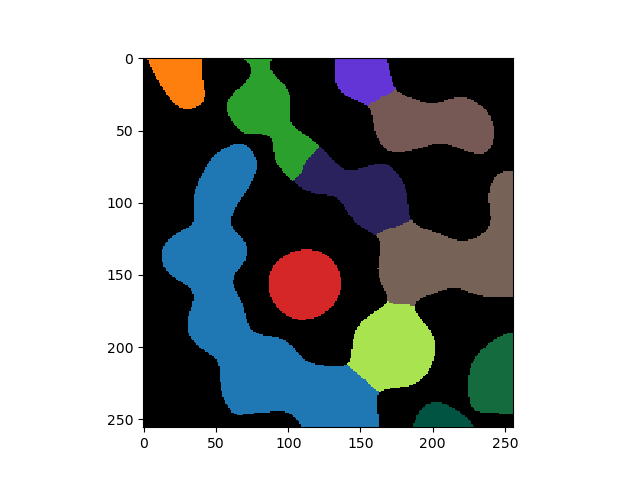

In [8]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=11, outline_sigma=10)
labels